In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv('sierraleone-bumbuna.csv')

# Display the first few rows to verify the data is loaded correctly
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Drop the 'comments' column if it exists
df_cleaned = df.drop(columns=['Comments'], errors='ignore')

# Confirm the column has been dropped
df_cleaned.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [4]:
# Calculate mean, median, standard deviation, min, and max for each numeric column
summary_stats = df_cleaned.describe().T
summary_stats['median'] = df_cleaned.median()

# Display the summary statistics
summary_stats


,count,mean,std,min,25%,50%,75%,max,median
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0,0.3
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0,-0.1
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0,-0.1
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0,3.6
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0,3.4
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9,25.3
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0,85.4
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2,0.8
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9,1.6
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1,0.4


In [5]:
# Check for missing values in each column
missing_values_cleaned = df_cleaned.isnull().sum()

# Calculate the percentage of missing values
missing_percentage_cleaned = (missing_values_cleaned / len(df_cleaned)) * 100

# Combine both into a DataFrame for better readability
missing_data_cleaned = pd.DataFrame({'Missing Values': missing_values_cleaned, 'Percentage (%)': missing_percentage_cleaned})

# Display columns with missing data
missing_data_cleaned[missing_data_cleaned['Missing Values'] > 0]


,Missing Values,Percentage (%)


In [6]:
# Define a function to calculate Z-scores for each column and identify outliers
def find_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores > threshold).any(axis=1)]

# Identify outliers in the cleaned dataset
outliers_cleaned = find_outliers(df_cleaned.select_dtypes(include=[np.number]))

# Display the outliers
outliers_cleaned.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
208,-1.0,-0.1,-1.1,0.0,0.0,22.2,98.1,0.6,1.4,0.6,34.1,8.1,1001,0,0.2,22.6,22.9
293,-1.0,-0.2,-1.2,0.0,0.0,22.2,97.7,2.0,2.6,0.4,345.3,5.3,1002,0,0.2,22.6,22.9
596,485.2,53.0,417.5,471.8,460.7,24.5,87.8,0.4,1.1,0.5,77.5,0.3,1003,1,0.0,46.5,43.4
605,444.4,27.2,419.3,457.0,445.0,24.7,88.8,0.0,0.0,0.0,0.0,0.0,1003,1,0.0,46.3,43.5
653,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6


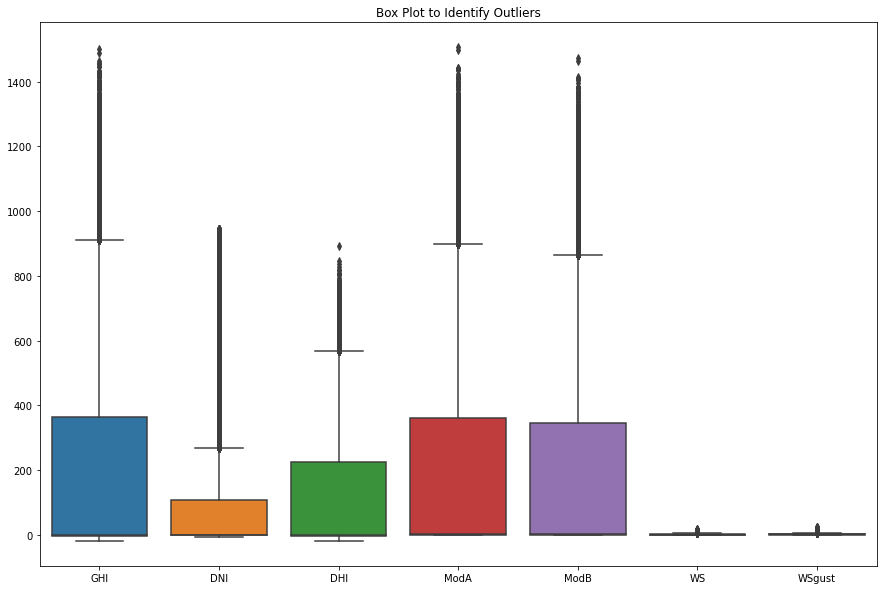

In [7]:
# Visualize outliers using box plots for key columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
plt.title('Box Plot to Identify Outliers')
plt.show()


In [8]:
# Define a function to calculate Z-scores for each column and identify outliers
def find_outliers(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores > threshold).any(axis=1)]

# Select numeric columns of interest
columns_of_interest = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data_of_interest = df_cleaned[columns_of_interest]

# Identify outliers in the selected columns
outliers = find_outliers(data_of_interest)

# Display the outliers
outliers.head()


,GHI,DNI,DHI,ModA,ModB,WS,WSgust
653,814.0,257.0,594.3,878.0,856.0,0.5,1.1
654,826.0,263.5,599.6,883.0,861.0,1.7,2.4
655,851.0,285.0,605.9,912.0,890.0,1.6,2.1
656,823.0,254.8,603.9,878.0,856.0,0.8,1.6
657,810.0,244.5,598.8,864.0,843.0,0.6,1.6


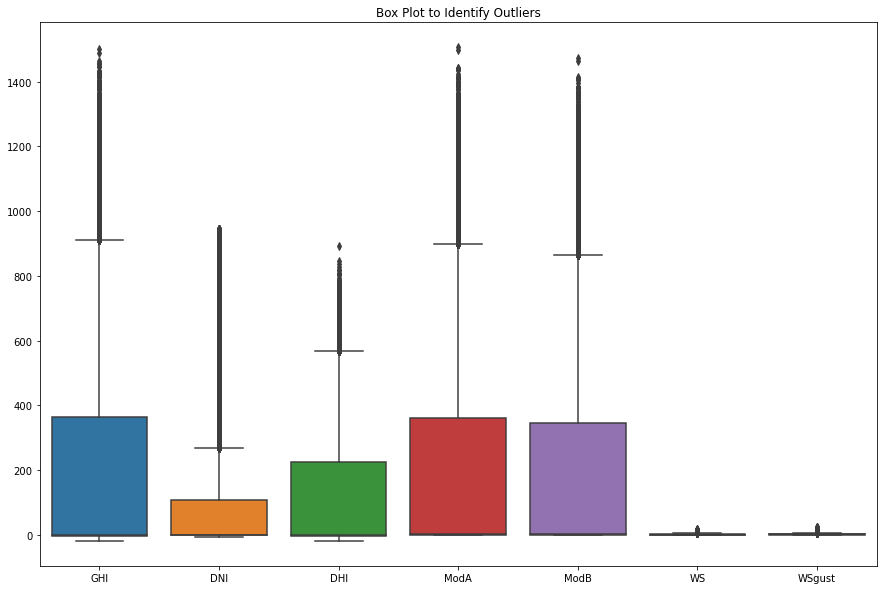

In [9]:
# Visualize outliers using box plots for key columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned[columns_of_interest])
plt.title('Box Plot to Identify Outliers')
plt.show()


In [10]:
# Check for negative values in columns with expected positive values
incorrect_entries = df_cleaned[(df_cleaned['GHI'] < 0) | (df_cleaned['DNI'] < 0) | (df_cleaned['DHI'] < 0)]

# Display any incorrect entries
incorrect_entries


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [11]:
# Check for negative or implausible values in sensor readings
incorrect_sensor_entries = df_cleaned[(df_cleaned['ModA'] < 0) | (df_cleaned['ModB'] < 0)]

# Display any incorrect sensor readings
incorrect_sensor_entries


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB


In [12]:
# Investigate the number of incorrect entries by column
incorrect_entries_summary = {
    'GHI Negative': (df_cleaned['GHI'] < 0).sum(),
    'DNI Negative': (df_cleaned['DNI'] < 0).sum(),
    'DHI Negative': (df_cleaned['DHI'] < 0).sum()
}

# Display the summary of incorrect entries
pd.DataFrame(incorrect_entries_summary, index=['Count'])


,GHI Negative,DNI Negative,DHI Negative
Count,261135,266352,263128


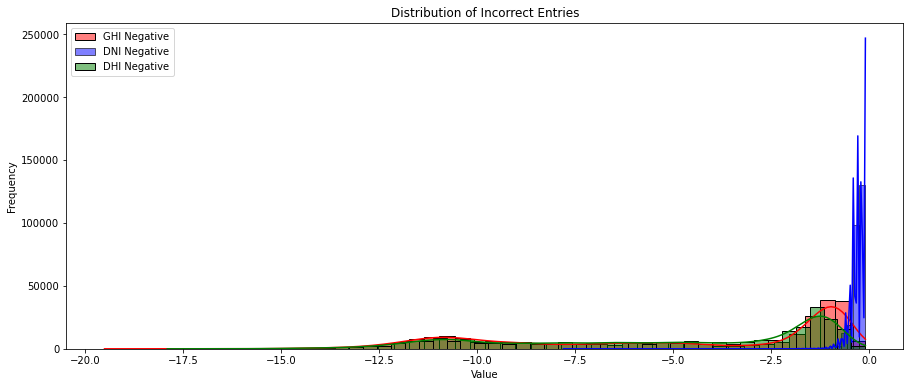

In [13]:
# Visualize the distribution of incorrect entries
plt.figure(figsize=(15, 6))
sns.histplot(df_cleaned[df_cleaned['GHI'] < 0]['GHI'], bins=50, kde=True, label='GHI Negative', color='r')
sns.histplot(df_cleaned[df_cleaned['DNI'] < 0]['DNI'], bins=50, kde=True, label='DNI Negative', color='b')
sns.histplot(df_cleaned[df_cleaned['DHI'] < 0]['DHI'], bins=50, kde=True, label='DHI Negative', color='g')
plt.legend()
plt.title('Distribution of Incorrect Entries')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Define a function to replace negative values with a minimum threshold or zero
def adjust_negative_values(data, columns, adjustment_value=0):
    for column in columns:
        data[column] = data[column].apply(lambda x: adjustment_value if x < 0 else x)
    return data

# List of columns to adjust
columns_to_adjust = ['GHI', 'DNI', 'DHI']

# Adjust negative values to zero or another minimum threshold
df_cleaned = adjust_negative_values(df_cleaned, columns_to_adjust)


In [15]:
# Verify the changes
negative_entries_after_adjustment = df_cleaned[(df_cleaned['GHI'] < 0) | (df_cleaned['DNI'] < 0) | (df_cleaned['DHI'] < 0)]

# Display any remaining negative entries
negative_entries_after_adjustment


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB


In [16]:
# Recalculate summary statistics
summary_stats_cleaned = df_cleaned.describe().T
summary_stats_cleaned['median'] = df_cleaned.median()

# Display the updated summary statistics
summary_stats_cleaned


,count,mean,std,min,25%,50%,75%,max,median
GHI,525600.0,204.406778,296.787520,0.0,0.0,0.3,362.4,1499.0,0.3
DNI,525600.0,116.523731,218.573992,0.0,0.0,0.0,107.0,946.0,0.0
DHI,525600.0,116.273677,157.020868,0.0,0.0,0.0,224.7,892.0,0.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0,3.6
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0,3.4
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9,25.3
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0,85.4
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2,0.8
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9,1.6
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1,0.4


In [17]:
# Check for any remaining negative values
remaining_negative_entries = df_cleaned[(df_cleaned['GHI'] < 0) | (df_cleaned['DNI'] < 0) | (df_cleaned['DHI'] < 0)]

# Display any remaining negative entries
remaining_negative_entries


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB


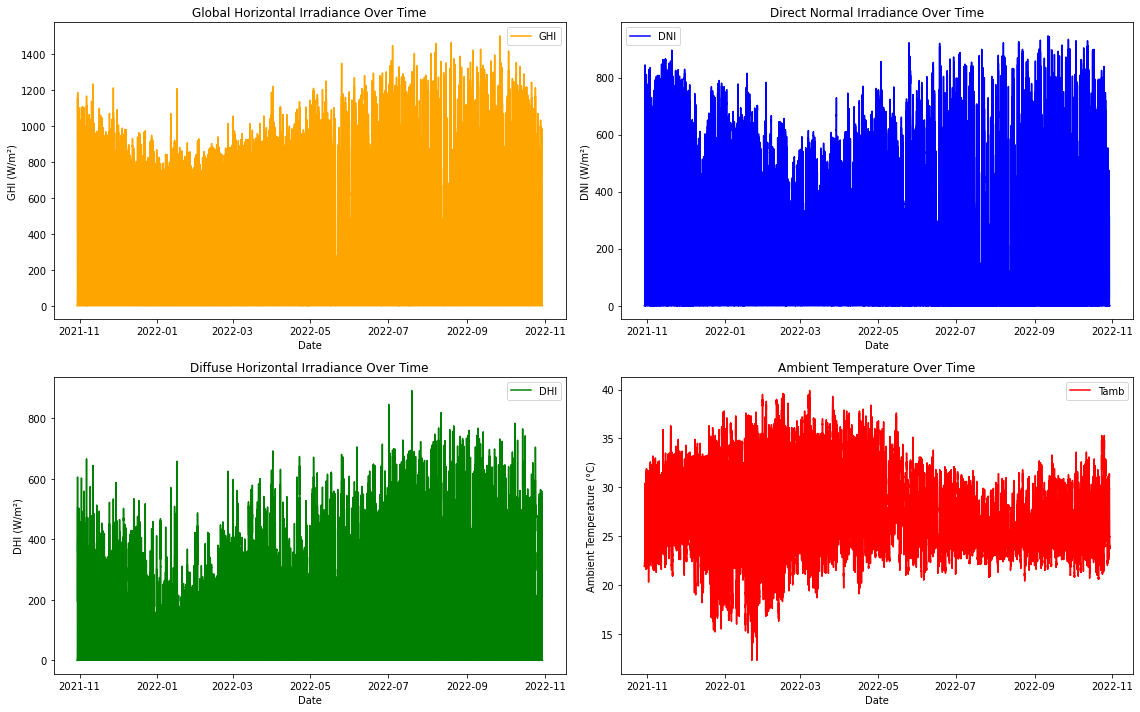

In [18]:
# Convert 'Timestamp' to datetime format
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Set 'Timestamp' as the index for easier plotting
df_cleaned.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(16, 10))

# Plot Global Horizontal Irradiance (GHI)
plt.subplot(2, 2, 1)
plt.plot(df_cleaned.index, df_cleaned['GHI'], label='GHI', color='orange')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance Over Time')
plt.legend()

# Plot Direct Normal Irradiance (DNI)
plt.subplot(2, 2, 2)
plt.plot(df_cleaned.index, df_cleaned['DNI'], label='DNI', color='blue')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.title('Direct Normal Irradiance Over Time')
plt.legend()

# Plot Diffuse Horizontal Irradiance (DHI)
plt.subplot(2, 2, 3)
plt.plot(df_cleaned.index, df_cleaned['DHI'], label='DHI', color='green')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')
plt.title('Diffuse Horizontal Irradiance Over Time')
plt.legend()

# Plot Ambient Temperature (Tamb)
plt.subplot(2, 2, 4)
plt.plot(df_cleaned.index, df_cleaned['Tamb'], label='Tamb', color='red')
plt.xlabel('Date')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Ambient Temperature Over Time')
plt.legend()

plt.tight_layout()
plt.show()


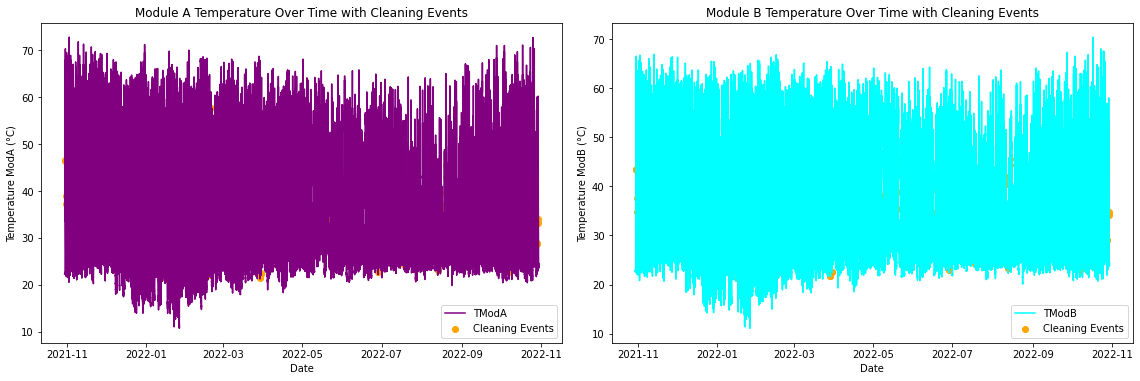

In [19]:
# Plot ModA and ModB over time, distinguishing by cleaning events
plt.figure(figsize=(16, 10))

# Plot Module A Temperature with cleaning events
plt.subplot(2, 2, 1)
plt.plot(df_cleaned.index, df_cleaned['TModA'], label='TModA', color='purple')
plt.scatter(df_cleaned.index[df_cleaned['Cleaning'] == 1], df_cleaned[df_cleaned['Cleaning'] == 1]['TModA'], color='orange', marker='o', label='Cleaning Events')
plt.xlabel('Date')
plt.ylabel('Temperature ModA (°C)')
plt.title('Module A Temperature Over Time with Cleaning Events')
plt.legend()

# Plot Module B Temperature with cleaning events
plt.subplot(2, 2, 2)
plt.plot(df_cleaned.index, df_cleaned['TModB'], label='TModB', color='cyan')
plt.scatter(df_cleaned.index[df_cleaned['Cleaning'] == 1], df_cleaned[df_cleaned['Cleaning'] == 1]['TModB'], color='orange', marker='o', label='Cleaning Events')
plt.xlabel('Date')
plt.ylabel('Temperature ModB (°C)')
plt.title('Module B Temperature Over Time with Cleaning Events')
plt.legend()

plt.tight_layout()
plt.show()


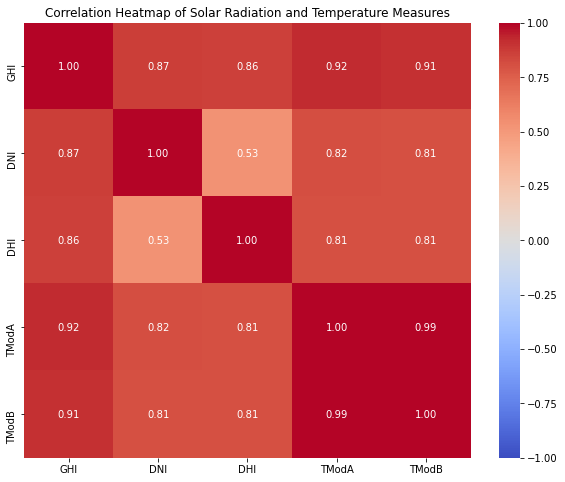

In [20]:
# Select relevant columns for correlation analysis
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df_cleaned[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Solar Radiation and Temperature Measures')
plt.show()


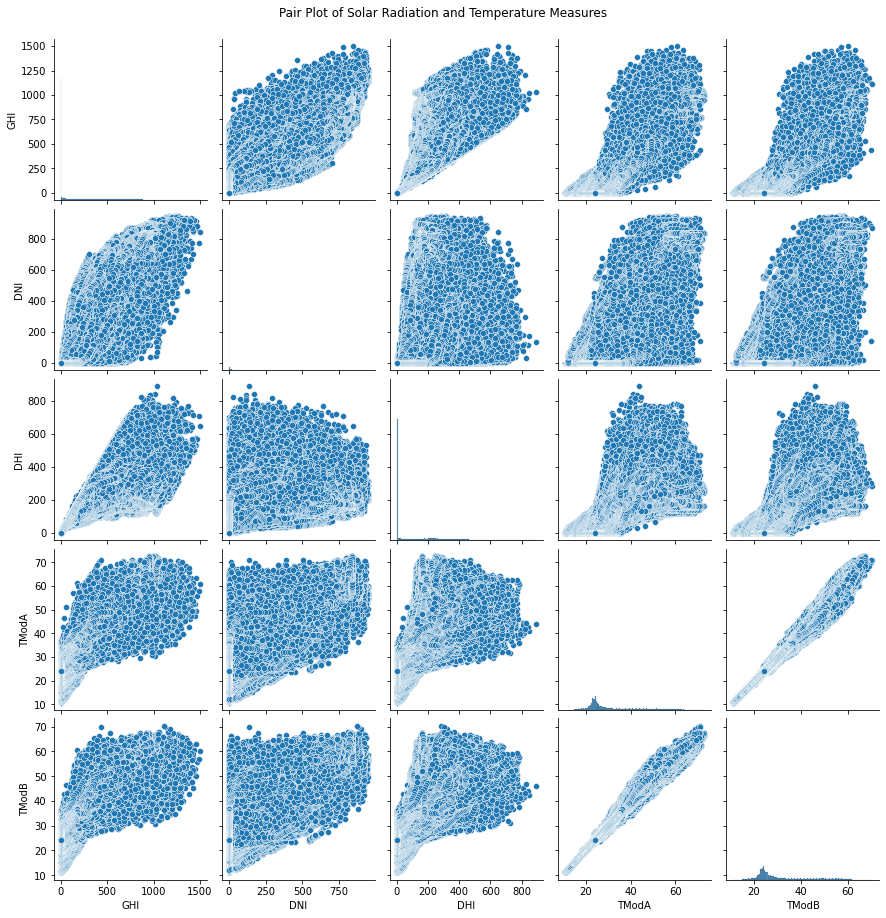

In [21]:
# Create a pair plot for the selected columns
sns.pairplot(df_cleaned[correlation_columns])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()


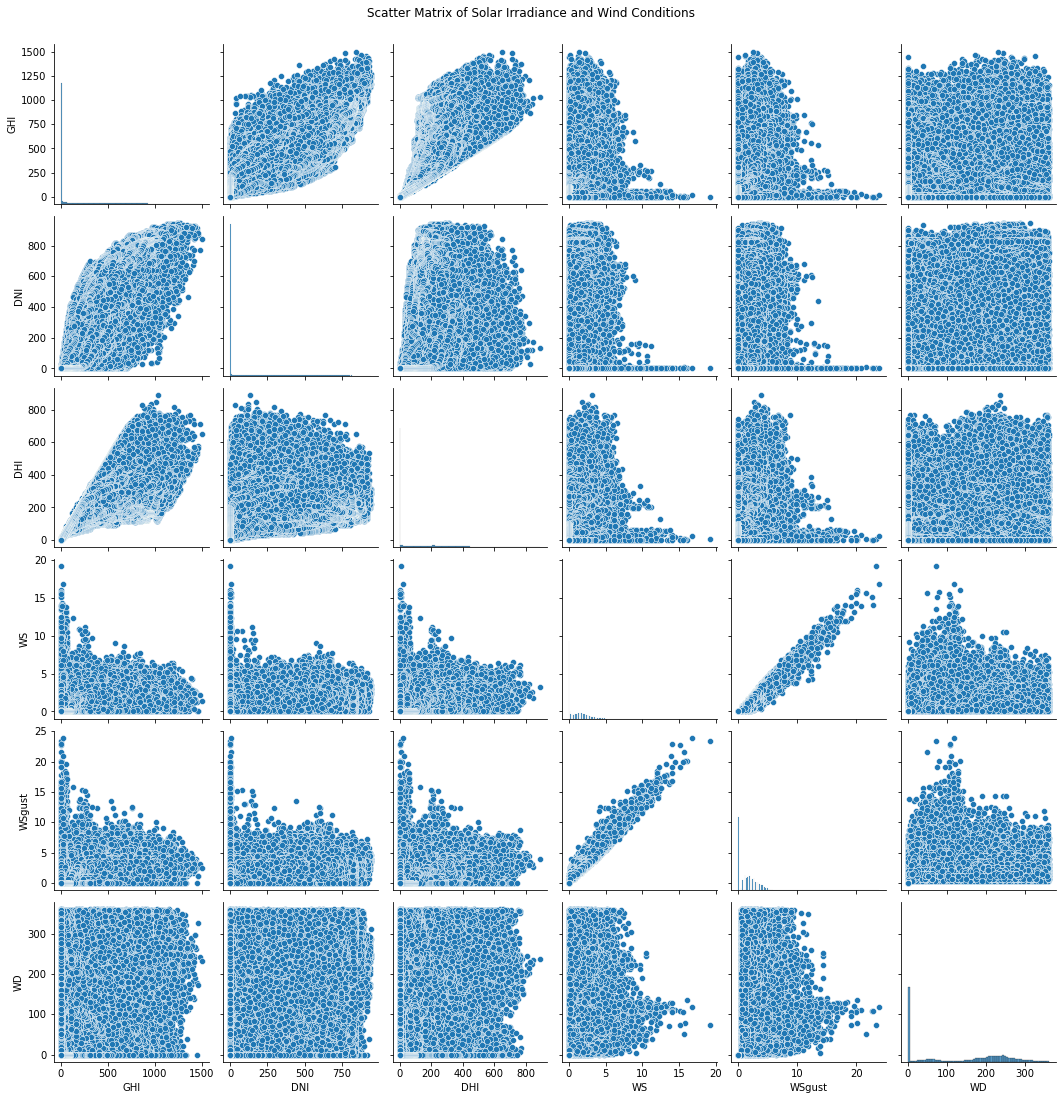

In [22]:
# Select columns for scatter matrix
scatter_matrix_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_matrix_df = df_cleaned[scatter_matrix_columns]

# Create scatter matrix (pair plot) to explore relationships
sns.pairplot(scatter_matrix_df)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()


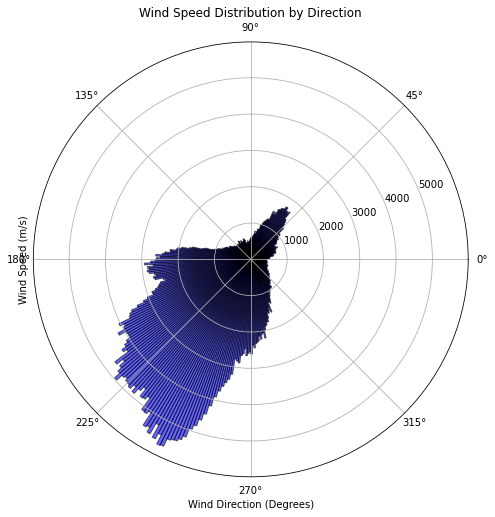

In [23]:
# Convert wind direction to radians for polar plotting
df_cleaned['WD_rad'] = np.deg2rad(df_cleaned['WD'])

# Plot Polar plot for wind speed and direction
plt.figure(figsize=(12, 8))

# Polar plot for wind direction distribution
ax = plt.subplot(projection='polar')
ax.hist(df_cleaned['WD_rad'], bins=360, weights=df_cleaned['WS'], color='b', alpha=0.6, edgecolor='k')
ax.set_title('Wind Speed Distribution by Direction')
ax.set_xlabel('Wind Direction (Degrees)')
ax.set_ylabel('Wind Speed (m/s)')

plt.show()


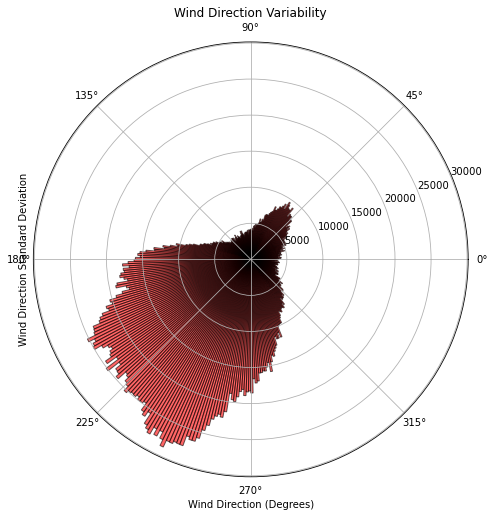

In [24]:
# Polar plot for wind direction variability
plt.figure(figsize=(12, 8))

# Plot Polar plot for wind direction variability
ax = plt.subplot(projection='polar')
ax.hist(df_cleaned['WD_rad'], bins=360, weights=df_cleaned['WDstdev'], color='r', alpha=0.6, edgecolor='k')
ax.set_title('Wind Direction Variability')
ax.set_xlabel('Wind Direction (Degrees)')
ax.set_ylabel('Wind Direction Standard Deviation')

plt.show()


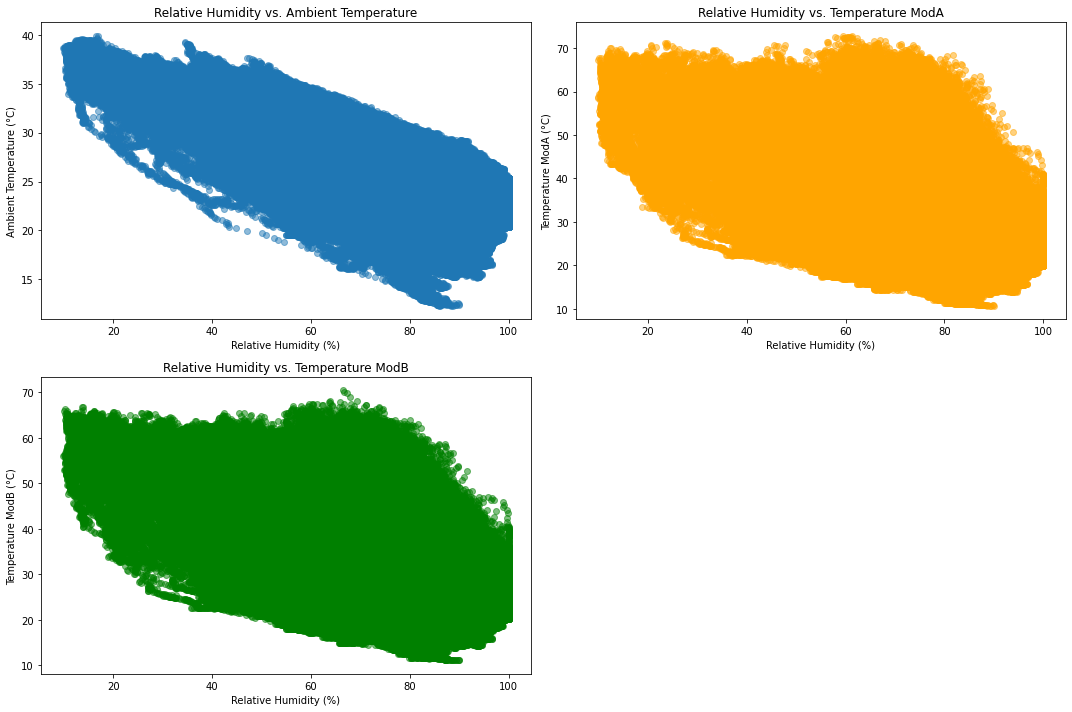

In [25]:
# Plot Relative Humidity vs. Temperature Readings
plt.figure(figsize=(15, 10))

# Tamb vs. RH
plt.subplot(2, 2, 1)
plt.scatter(df_cleaned['RH'], df_cleaned['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Relative Humidity vs. Ambient Temperature')

# TModA vs. RH
plt.subplot(2, 2, 2)
plt.scatter(df_cleaned['RH'], df_cleaned['TModA'], alpha=0.5, color='orange')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature ModA (°C)')
plt.title('Relative Humidity vs. Temperature ModA')

# TModB vs. RH
plt.subplot(2, 2, 3)
plt.scatter(df_cleaned['RH'], df_cleaned['TModB'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature ModB (°C)')
plt.title('Relative Humidity vs. Temperature ModB')

plt.tight_layout()
plt.show()


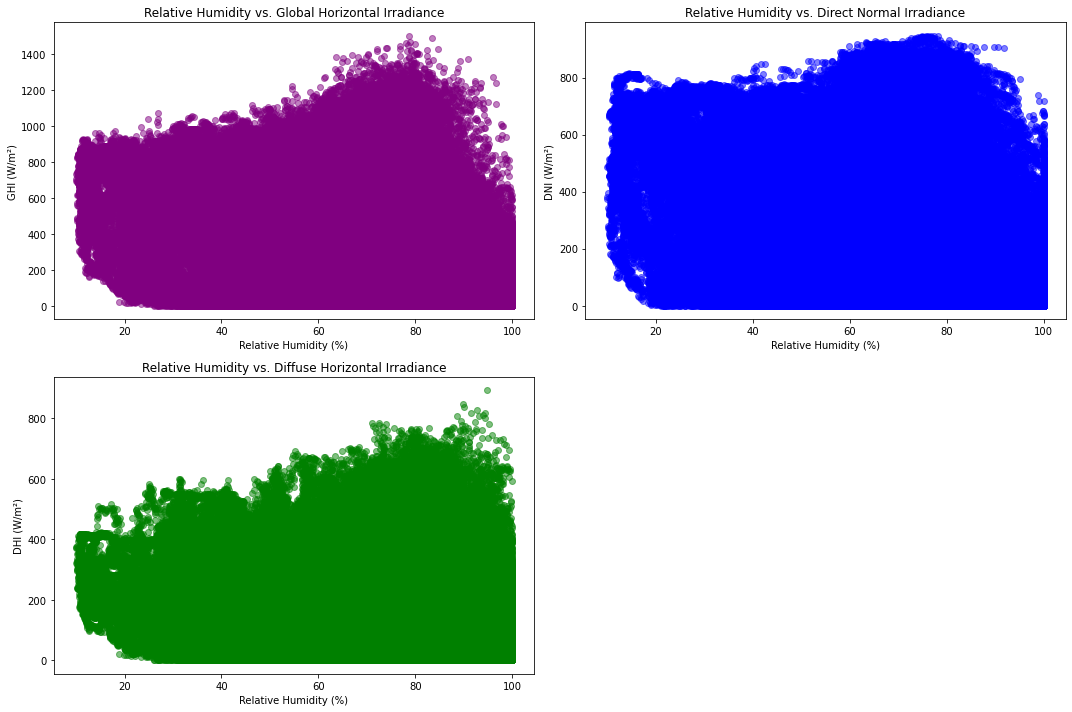

In [26]:
# Plot Relative Humidity vs. Solar Radiation
plt.figure(figsize=(15, 10))

# GHI vs. RH
plt.subplot(2, 2, 1)
plt.scatter(df_cleaned['RH'], df_cleaned['GHI'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.title('Relative Humidity vs. Global Horizontal Irradiance')

# DNI vs. RH
plt.subplot(2, 2, 2)
plt.scatter(df_cleaned['RH'], df_cleaned['DNI'], alpha=0.5, color='blue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.title('Relative Humidity vs. Direct Normal Irradiance')

# DHI vs. RH
plt.subplot(2, 2, 3)
plt.scatter(df_cleaned['RH'], df_cleaned['DHI'], alpha=0.5, color='green')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.title('Relative Humidity vs. Diffuse Horizontal Irradiance')

plt.tight_layout()
plt.show()


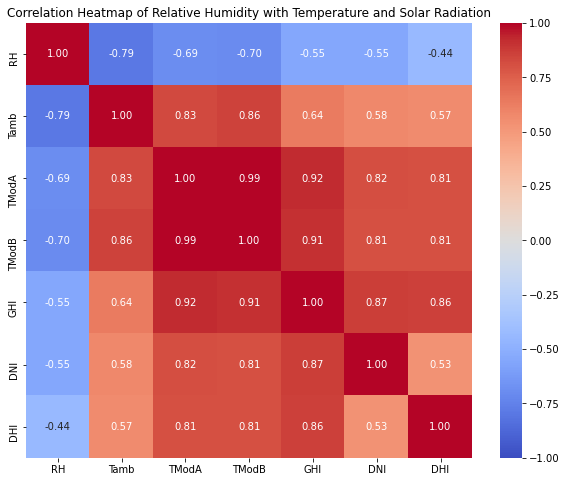

In [27]:
# Select relevant columns for correlation analysis
humidity_temperature_solar = df_cleaned[['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']]
correlation_matrix_humidity = humidity_temperature_solar.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_humidity, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Relative Humidity with Temperature and Solar Radiation')
plt.show()


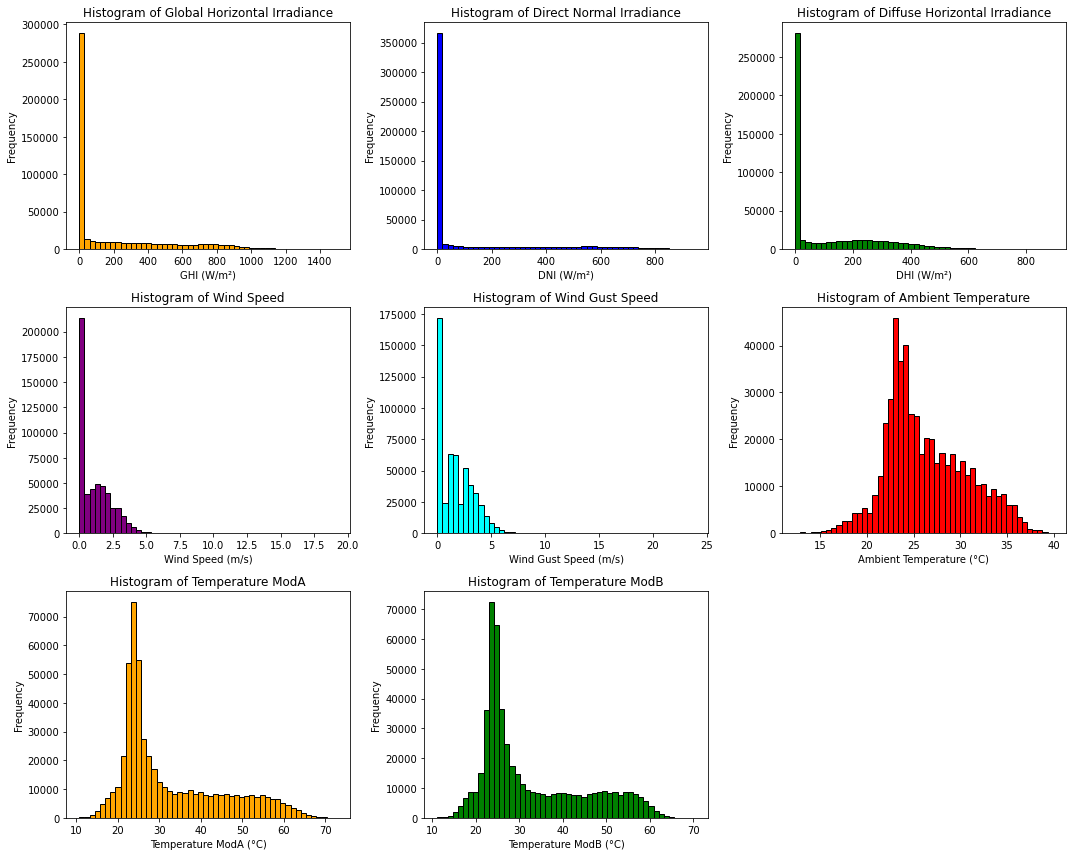

In [28]:
# Plot histograms for selected variables
plt.figure(figsize=(15, 12))

# Histogram for Global Horizontal Irradiance (GHI)
plt.subplot(3, 3, 1)
plt.hist(df_cleaned['GHI'], bins=50, color='orange', edgecolor='k')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of Global Horizontal Irradiance')

# Histogram for Direct Normal Irradiance (DNI)
plt.subplot(3, 3, 2)
plt.hist(df_cleaned['DNI'], bins=50, color='blue', edgecolor='k')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of Direct Normal Irradiance')

# Histogram for Diffuse Horizontal Irradiance (DHI)
plt.subplot(3, 3, 3)
plt.hist(df_cleaned['DHI'], bins=50, color='green', edgecolor='k')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of Diffuse Horizontal Irradiance')

# Histogram for Wind Speed (WS)
plt.subplot(3, 3, 4)
plt.hist(df_cleaned['WS'], bins=50, color='purple', edgecolor='k')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')

# Histogram for Wind Gust Speed (WSgust)
plt.subplot(3, 3, 5)
plt.hist(df_cleaned['WSgust'], bins=50, color='cyan', edgecolor='k')
plt.xlabel('Wind Gust Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Gust Speed')

# Histogram for Ambient Temperature (Tamb)
plt.subplot(3, 3, 6)
plt.hist(df_cleaned['Tamb'], bins=50, color='red', edgecolor='k')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Ambient Temperature')

# Histogram for Temperature ModA (TModA)
plt.subplot(3, 3, 7)
plt.hist(df_cleaned['TModA'], bins=50, color='orange', edgecolor='k')
plt.xlabel('Temperature ModA (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature ModA')

# Histogram for Temperature ModB (TModB)
plt.subplot(3, 3, 8)
plt.hist(df_cleaned['TModB'], bins=50, color='green', edgecolor='k')
plt.xlabel('Temperature ModB (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature ModB')

plt.tight_layout()
plt.show()


In [29]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df_cleaned.select_dtypes(include=[np.number]).apply(zscore)

# Identify outliers based on Z-score threshold (e.g., 3)
threshold = 3
outliers = (z_scores.abs() > threshold)

# Display some examples of outliers
outlier_samples = df_cleaned[outliers.any(axis=1)].head()
print(outlier_samples)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-10-30 03:29:00    0.0    0.0    0.0    0.0    0.0  22.2  98.1  0.6   
2021-10-30 04:54:00    0.0    0.0    0.0    0.0    0.0  22.2  97.7  2.0   
2021-10-30 09:57:00  485.2   53.0  417.5  471.8  460.7  24.5  87.8  0.4   
2021-10-30 10:06:00  444.4   27.2  419.3  457.0  445.0  24.7  88.8  0.0   
2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   

                     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  \
Timestamp                                                              
2021-10-30 03:29:00     1.4      0.6   34.1      8.1  1001         0   
2021-10-30 04:54:00     2.6      0.4  345.3      5.3  1002         0   
2021-10-30 09:57:00     1.1      0.5   77.5      0.3  1003         1   
2021-10-30 10:06:00     0.0      0.0    0.0      0.0  1003         1   
2021-10-30 10:54:00     1.1      0.5   81.

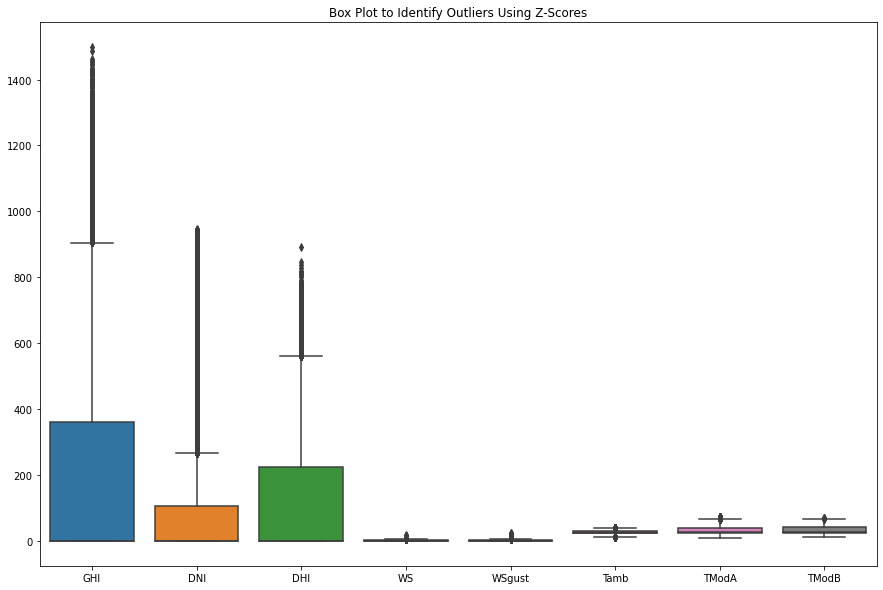

In [30]:
# Plot box plots for key columns to identify outliers visually
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'Tamb', 'TModA', 'TModB']])
plt.title('Box Plot to Identify Outliers Using Z-Scores')
plt.show()


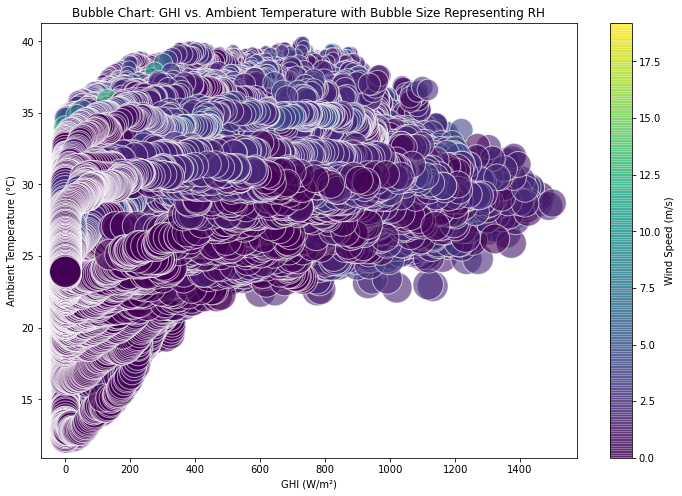

In [31]:
# Plot bubble chart: GHI vs. Tamb with bubble size representing RH
plt.figure(figsize=(12, 8))

# Create bubble chart
plt.scatter(
    x=df_cleaned['GHI'], 
    y=df_cleaned['Tamb'], 
    s=df_cleaned['RH'] * 10,  # Scale the bubble size for better visualization
    alpha=0.6, 
    edgecolors="w", 
    c=df_cleaned['WS'],  # Color by wind speed
    cmap='viridis'
)

# Add color bar
plt.colorbar(label='Wind Speed (m/s)')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Ambient Temperature with Bubble Size Representing RH')
plt.show()


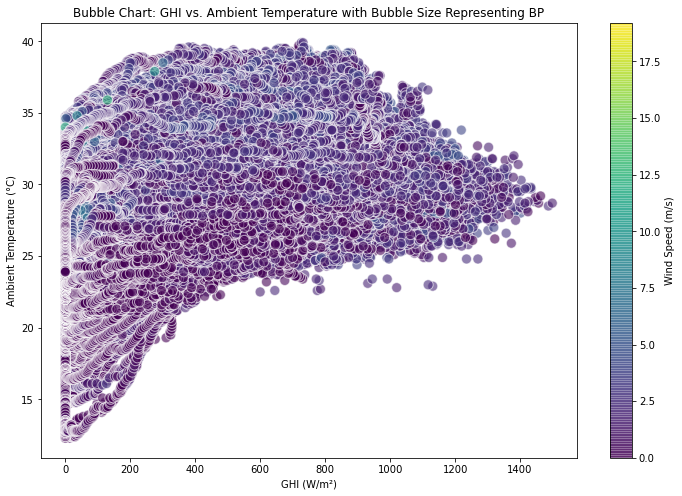

In [32]:
# Plot bubble chart: GHI vs. Tamb with bubble size representing BP
plt.figure(figsize=(12, 8))

# Create bubble chart
plt.scatter(
    x=df_cleaned['GHI'], 
    y=df_cleaned['Tamb'], 
    s=df_cleaned['BP'] / 10,  # Scale the bubble size for better visualization
    alpha=0.6, 
    edgecolors="w", 
    c=df_cleaned['WS'],  # Color by wind speed
    cmap='viridis'
)

# Add color bar
plt.colorbar(label='Wind Speed (m/s)')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Ambient Temperature with Bubble Size Representing BP')
plt.show()


In [33]:
# Check for remaining missing values
missing_values_remaining = df_cleaned.isnull().sum()

# Calculate the percentage of missing values
missing_percentage_remaining = (missing_values_remaining / len(df_cleaned)) * 100

# Combine both into a DataFrame for better readability
missing_data_remaining = pd.DataFrame({'Missing Values': missing_values_remaining, 'Percentage (%)': missing_percentage_remaining})

# Display columns with missing data
print(missing_data_remaining[missing_data_remaining['Missing Values'] > 0])


Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [34]:
# Remove outliers based on Z-scores
df_cleaned_no_outliers = df_cleaned[~(outliers.any(axis=1))]

# Confirm that outliers have been removed
print(df_cleaned_no_outliers.shape)


(494388, 18)
